## 第7章 様々な分類予測を行う10本ノック

### ノック61 : 使用するデータを確認しよう

In [9]:
from sklearn.datasets import load_breast_cancer

load_data = load_breast_cancer()

display(load_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#### データフレームへの変換

In [14]:
import pandas as pd

df = pd.DataFrame(load_data.data, columns=load_data.feature_names)
df["y"] = load_data.target

display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### 代表値の出力

In [16]:
tg_df = df[["mean radius", "mean texture", "y"]]

display(tg_df.describe())

,mean radius,mean texture,y
count,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.627417
std,3.524049,4.301036,0.483918
min,6.981000,9.710000,0.000000
25%,11.700000,16.170000,0.000000
50%,13.370000,18.840000,1.000000
75%,15.780000,21.800000,1.000000
max,28.110000,39.280000,1.000000


#### 相関係数の出力

In [17]:
tg_df.corr()

,mean radius,mean texture,y
mean radius,1.000000,0.323782,-0.730029
mean texture,0.323782,1.000000,-0.415185
y,-0.730029,-0.415185,1.000000


#### カテゴリ種類数の確認

In [18]:
display(tg_df["y"].unique())

array([0, 1])

In [20]:
display(len(tg_df.loc[ tg_df["y"] == 0 ]))
display(len(tg_df.loc[ tg_df["y"] == 1 ]))

212

357

#### データの可視化

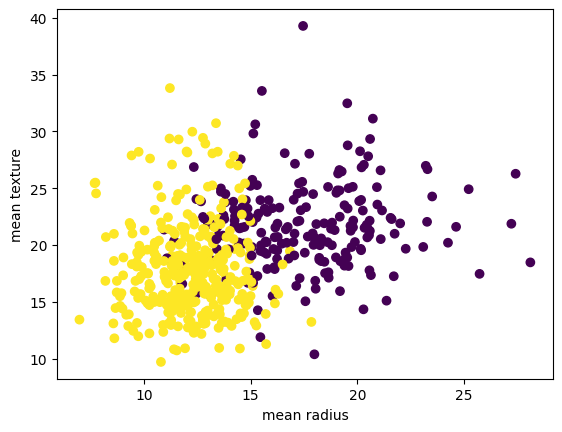

In [21]:
import matplotlib.pyplot as plt

plt.scatter(tg_df["mean radius"], tg_df["mean texture"], c=tg_df["y"])

plt.xlabel("mean radius")
plt.ylabel("mean texture")

plt.show()

### ノック62 : データを加工しよう

#### 説明変数と目的変数の分割

In [22]:
X = tg_df[["mean radius", "mean texture"]]
y = tg_df["y"]

display(X.head())
display(y.head())

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

#### 訓練データとテストデータの分割

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

display(len(X_train))
display(X_train.head())

display(len(X_test))
display(X_test.head())

398

,mean radius,mean texture
478,11.490,14.59
303,10.490,18.61
155,12.250,17.94
186,18.310,18.58
101,6.981,13.43


171

,mean radius,mean texture
512,13.40,20.52
457,13.21,25.25
439,14.02,15.66
298,14.26,18.17
37,13.03,18.42


#### データの標準化

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

display(X_train_scaled[:10])
display(X_test_scaled[:10])

array([[-0.74998027, -1.09978744],
       [-1.02821446, -0.1392617 ],
       [-0.53852228, -0.29934933],
       [ 1.14757693, -0.14642981],
       [-2.00453824, -1.37695407],
       [-1.2238131 ,  0.17852417],
       [-0.3075879 , -0.83217828],
       [-0.84457989, -1.46058193],
       [ 0.25444517,  0.67551261],
       [ 1.23661187,  1.41382717]])

array([[-0.17715788,  0.22140254],
       [-0.23403396,  1.26339611],
       [ 0.00843776, -0.84922934],
       [ 0.08028123, -0.29628983],
       [-0.28791656, -0.24121617],
       [-0.79381434, -0.19936019],
       [-0.5812774 ,  0.70605071],
       [-0.68604913, -0.08921288],
       [-1.87475924,  1.31626682],
       [-1.11710996, -1.05850923]])

### ノック63 : ロジスティクス回帰モデルを構築しよう

#### ロジスティクス回帰モデルの構築

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

#### 予測値の出力

In [34]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

display(y_train[:5])
display(y_train_pred[:5])

display(y_test[:5])
display(y_test_pred[:5])

478    1
303    1
155    1
186    0
101    1
Name: y, dtype: int64

array([1, 1, 1, 0, 1])

512    0
457    1
439    1
298    1
37     1
Name: y, dtype: int64

array([1, 1, 1, 1, 1])

#### 予測値の可視化（訓練データ）

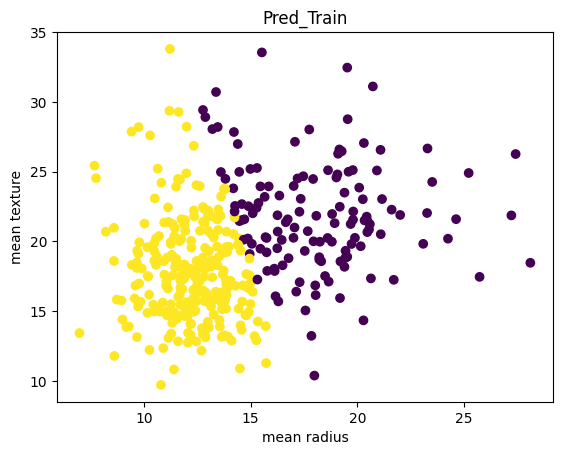

In [38]:
plt.scatter(X_train["mean radius"], X_train["mean texture"], c=y_train_pred)

plt.title("Pred_Train")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

#### 予測値の可視化（テストデータ）

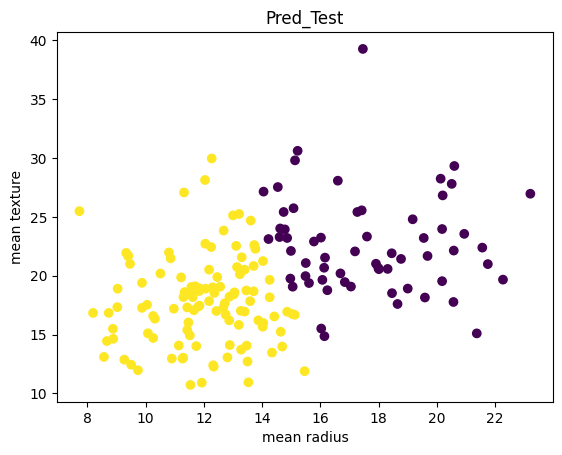

In [39]:
plt.scatter(X_test["mean radius"], X_test["mean texture"], c=y_test_pred)

plt.title("Pred_Test")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

### ノック64 : ロジスティクス回帰モデルの決定境界を可視化してみよう

#### 決定境界の可視化（ロジスティクス回帰モデル）

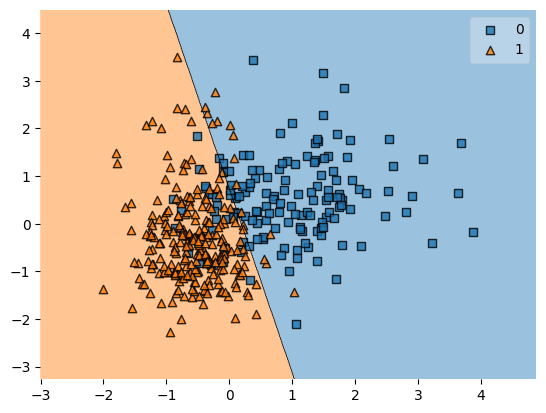

In [42]:
import numpy as np
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=log_reg)
plt.show()

### ノック65 : 線形SVMモデルを構築し、決定境界を可視化してみよう

#### 線形SVMモデルの構築および決定境界の可視化

/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


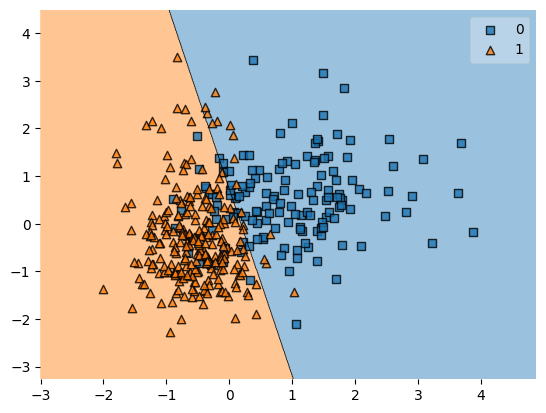

In [44]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(random_state=0).fit(X_train_scaled, y_train)

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=linear_svm)
plt.show()

### ノック66 : カーネルSVMモデルを構築し、決定境界を可視化してみよう

#### カーネルSVMモデルの構築と決定境界の可視化

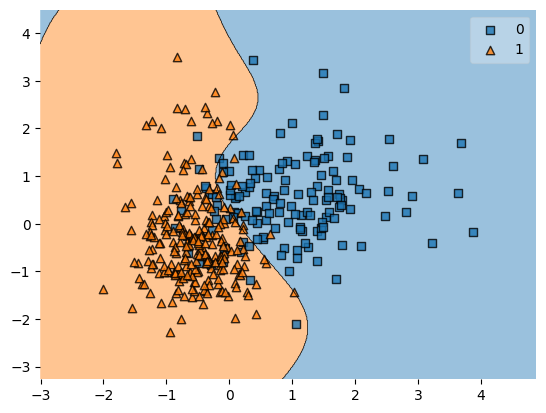

In [46]:
from sklearn.svm import SVC

kernel_svm = SVC(kernel='rbf', random_state=0).fit(X_train_scaled, y_train)

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=kernel_svm)
plt.show()

### ノック67 : K近傍法モデルを構築し、決定境界を可視化してみよう

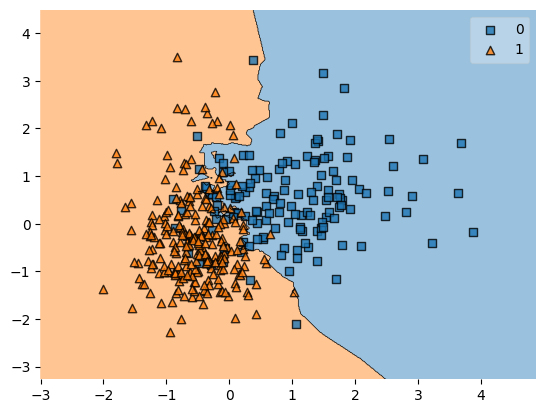

In [50]:
from sklearn.neighbors import KNeighborsClassifier

kn_cls = KNeighborsClassifier(n_neighbors=5, p=2).fit(X_train_scaled, y_train)

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=kn_cls)
plt.show()

### ノック68 : 決定木モデルを構築し、決定境界を可視化してみよう

#### 決定木モデルの構築

/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


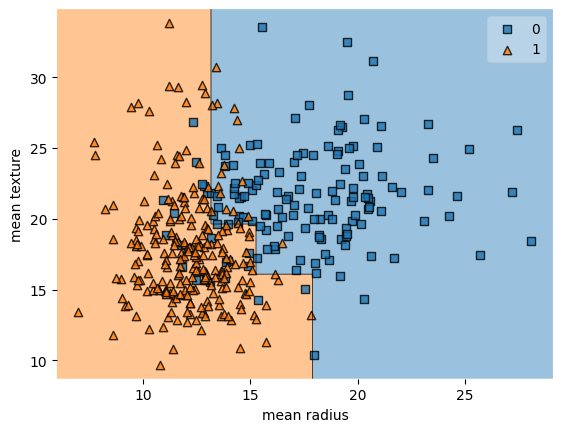

In [57]:
from sklearn.tree import DecisionTreeClassifier

tree_cls = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X_train, y_train)

plot_decision_regions(np.array(X_train), np.array(y_train), clf=tree_cls)

plt.xlabel("mean radius")
plt.ylabel("mean texture")

plt.show()

#### 決定木の可視化

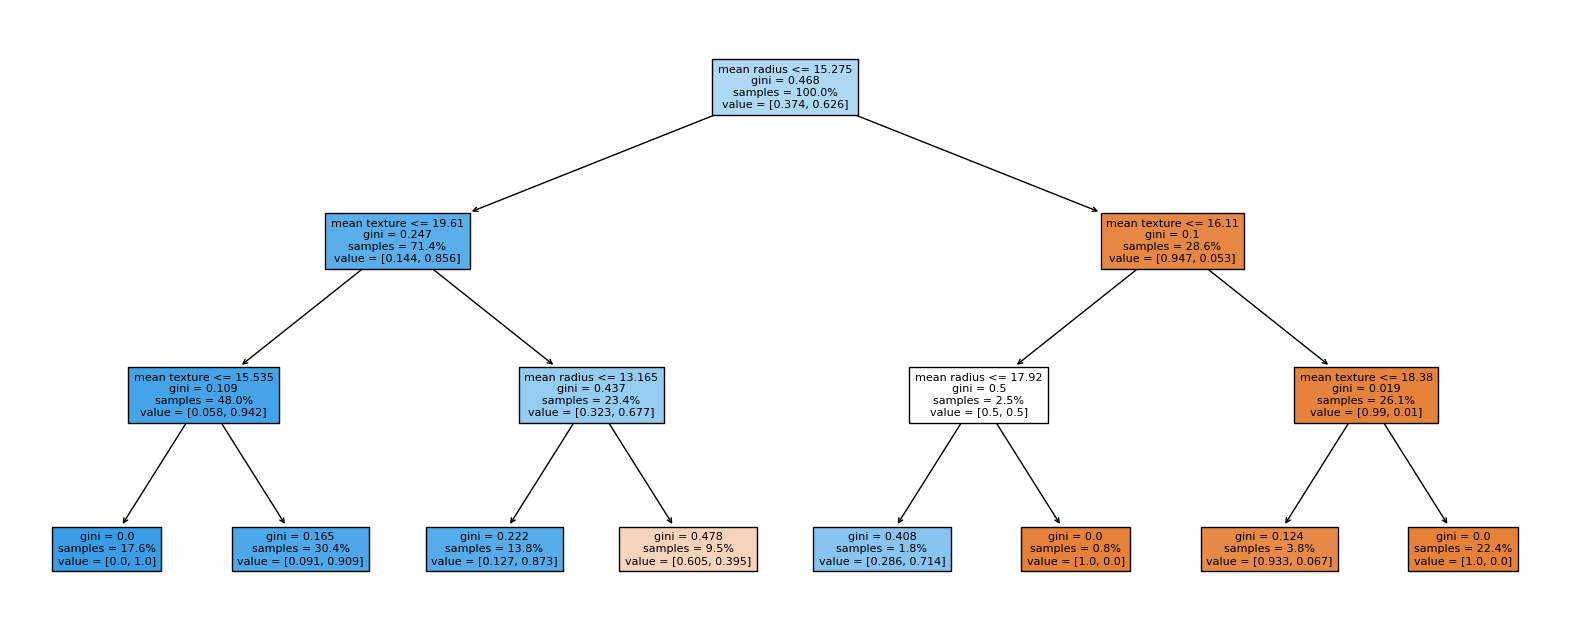

In [59]:
from sklearn import tree

plt.figure(figsize=(20, 8))

tree.plot_tree(tree_cls, feature_names=["mean radius", "mean texture"], filled=True, proportion=True, fontsize=8)
plt.show()

### ノック69 : ランダムフォレストモデルを構築し、決定境界を可視化してみよう

#### ランダムフォレストモデルの構築

/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


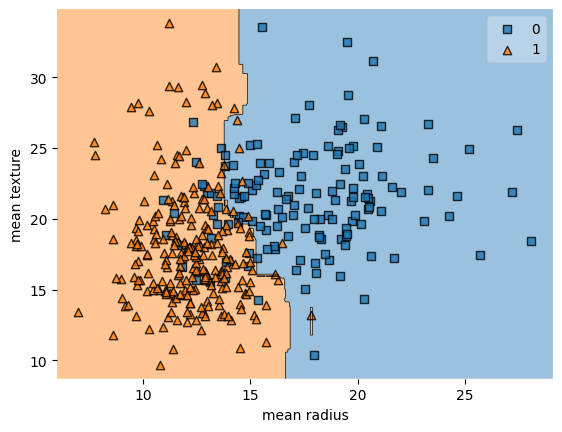

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, y_train)

plot_decision_regions(np.array(X_train), np.array(y_train), clf=rf_cls)

plt.xlabel("mean radius")
plt.ylabel("mean texture")

plt.show()

### ノック70 : 線形分離できないデータを分類してみよう

In [61]:
from sklearn.datasets import make_circles

X_circle, y_circle = make_circles(random_state=42, n_samples=100, noise=0.1, factor=0.3)

plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle)
plt.show()
